In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
from gower import gower_matrix
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from kmodes.kprototypes import KPrototypes

from gower import gower_matrix
from sklearn import preprocessing

In [68]:
df = pd.read_csv('AQI By State 1980-2022.csv')

df1 = df[df['Year'] <= 2000]
df2 = df[df['Year'] > 2000]
df1 = df1.iloc[:,3:31]
df.head()

,Geo_Loc,Year,State,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,POINT (-86.63186076199969 32.84057112200048),1980,Alabama,3900368,67,7,1382,1180,1169,213,...,8,0,1282,774,314,240,334,808,0,0
1,POINT (-147.72205903599973 64.84507995700051),1980,Alaska,405315,30,4,1184,280,1099,85,...,16,0,586,306,132,732,121,331,0,0
2,POINT (-111.76381127699972 34.865970280000454),1980,Arizona,2737774,15,7,1866,696,1561,305,...,7,0,1078,678,355,721,151,994,0,0
3,POINT (-92.27449074299966 34.74865012400045),1980,Arkansas,2288738,75,1,366,0,320,46,...,1,0,202,115,38,0,29,337,0,0
4,POINT (-120.99999953799971 37.63864012300047),1980,California,23800800,58,41,13728,1278,11221,2507,...,725,4,7869,4771,2215,1763,3685,8280,0,0


In [69]:
df1.head()


,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,3900368,67,7,1382,1180,1169,213,777,392,167,...,8,0,1282,774,314,240,334,808,0,0
1,405315,30,4,1184,280,1099,85,896,203,45,...,16,0,586,306,132,732,121,331,0,0
2,2737774,15,7,1866,696,1561,305,910,651,263,...,7,0,1078,678,355,721,151,994,0,0
3,2288738,75,1,366,0,320,46,265,55,28,...,1,0,202,115,38,0,29,337,0,0
4,23800800,58,41,13728,1278,11221,2507,7772,3449,1169,...,725,4,7869,4771,2215,1763,3685,8280,0,0


In [61]:
df1.describe()

,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,1.071000e+03,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.00000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.00000,1071.000000
mean,4.946008e+06,61.647059,14.892624,3785.342670,1654.723623,3503.737628,281.605042,2730.863679,772.873950,197.188609,...,18.812325,0.22409,2196.734827,1144.150327,546.129785,434.588235,511.316527,2291.016807,127.90943,420.511671
std,5.417769e+06,46.340154,11.332966,3135.360405,1590.245955,2799.172065,417.683825,2161.372307,734.911878,259.693856,...,66.488572,1.62694,2058.445154,1037.013321,477.432727,448.815679,704.887347,2268.266762,408.51435,564.298355
min,4.053150e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.225267e+06,23.000000,6.000000,1439.000000,454.000000,1345.000000,41.000000,1059.500000,240.000000,30.000000,...,0.000000,0.00000,756.500000,409.000000,214.000000,94.500000,55.000000,619.500000,0.00000,5.000000
50%,3.324144e+06,62.000000,12.000000,3049.000000,1189.000000,2813.000000,139.000000,2170.000000,608.000000,105.000000,...,3.000000,0.00000,1639.000000,819.000000,417.000000,307.000000,260.000000,1500.000000,0.00000,242.000000
75%,5.796466e+06,88.000000,21.000000,5456.000000,2375.000000,4913.500000,384.500000,3881.000000,1087.000000,275.000000,...,10.500000,0.00000,3151.500000,1605.500000,767.500000,623.000000,698.000000,3306.000000,48.00000,613.000000
max,3.398798e+07,254.000000,56.000000,18582.000000,9504.000000,16150.000000,3115.000000,12344.000000,4989.000000,2067.000000,...,725.000000,33.00000,29602.000000,5938.000000,2838.000000,3339.000000,3837.000000,13642.000000,3428.00000,3363.000000


In [63]:
df1.isna().sum()
df1 = df1.dropna()

In [64]:
df1.head()

,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,3900368,67,7,1382,1180,1169,213,777,392,167,...,8,0,1282,774,314,240,334,808,0,0
1,405315,30,4,1184,280,1099,85,896,203,45,...,16,0,586,306,132,732,121,331,0,0
2,2737774,15,7,1866,696,1561,305,910,651,263,...,7,0,1078,678,355,721,151,994,0,0
3,2288738,75,1,366,0,320,46,265,55,28,...,1,0,202,115,38,0,29,337,0,0
4,23800800,58,41,13728,1278,11221,2507,7772,3449,1169,...,725,4,7869,4771,2215,1763,3685,8280,0,0


,0,1,2,3,4,5,6,7,8,9,...,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338
count,3.280000e+02,3.280000e+02,328.000000,328.000000,3.280000e+02,3.280000e+02,328.000000,3.280000e+02,3.280000e+02,328.000000,...,328.000000,3.280000e+02,328.000000,328.000000,328.000000,3.280000e+02,328.0,328.000000,328.000000,328.000000
mean,1.572687e-253,9.141041e-01,0.995992,0.737020,7.392187e-01,8.440410e-01,0.954274,8.064215e-01,1.878974e-01,0.947054,...,0.994165,8.563286e-01,0.996834,0.995625,0.991465,9.387489e-01,1.0,0.991607,0.992848,0.974952
std,0.000000e+00,2.617973e-01,0.051329,0.432436,4.249833e-01,3.508045e-01,0.176043,3.805579e-01,3.808212e-01,0.204299,...,0.060470,3.442005e-01,0.055220,0.054709,0.085981,2.355468e-01,0.0,0.071865,0.067129,0.141114
min,0.000000e+00,8.715586e-42,0.305958,0.000000,8.304999e-287,3.783234e-83,0.000020,2.390299e-121,0.000000e+00,0.003893,...,0.128266,8.964914e-168,0.000562,0.075900,0.036909,2.409193e-238,1.0,0.166546,0.138229,0.005613
25%,0.000000e+00,1.000000e+00,1.000000,0.185739,2.129344e-01,1.000000e+00,1.000000,1.000000e+00,1.148284e-43,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000,1.000000
50%,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,2.053705e-15,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000,1.000000
75%,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,5.739096e-03,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000,1.000000
max,5.158413e-251,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000,1.000000


In [65]:
df_numerical_scale = df1

# Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numerical_scale)
df_numerical_scale = pd.DataFrame(scaled, columns = df_numerical_scale.columns, index = df_numerical_scale.index)
df_numerical_scale.describe().round(2)

,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,...,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00
mean,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.84,-1.31,-1.31,-1.21,-1.04,-1.25,-0.67,-1.26,-1.05,-0.76,...,-0.28,-0.14,-1.07,-1.10,-1.14,-0.97,-0.73,-1.01,-0.31,-0.75
25%,-0.69,-0.83,-0.79,-0.75,-0.76,-0.77,-0.58,-0.77,-0.73,-0.64,...,-0.28,-0.14,-0.70,-0.71,-0.70,-0.76,-0.65,-0.74,-0.31,-0.74
50%,-0.30,0.01,-0.26,-0.23,-0.29,-0.25,-0.34,-0.26,-0.22,-0.36,...,-0.24,-0.14,-0.27,-0.31,-0.27,-0.28,-0.36,-0.35,-0.31,-0.32
75%,0.16,0.57,0.54,0.53,0.45,0.50,0.25,0.53,0.43,0.30,...,-0.13,-0.14,0.46,0.45,0.46,0.42,0.26,0.45,-0.20,0.34
max,5.36,4.15,3.63,4.72,4.94,4.52,6.79,4.45,5.74,7.20,...,10.63,20.16,13.32,4.62,4.80,6.47,4.72,5.01,8.08,5.22


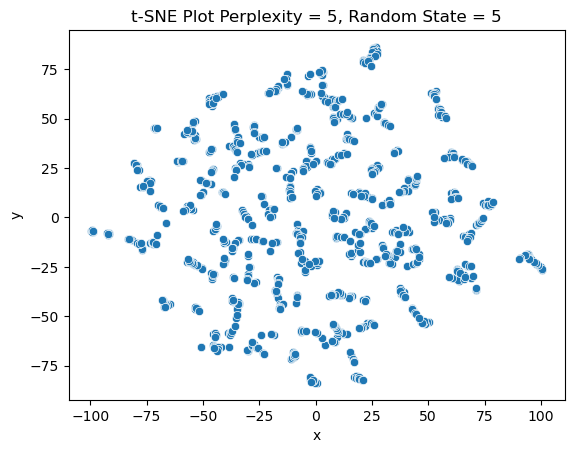

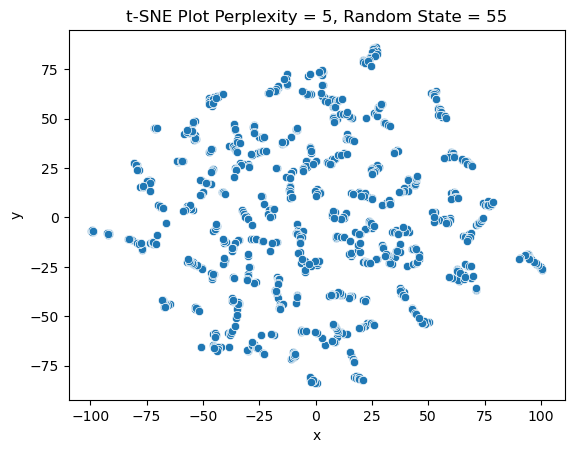

\../\../\../


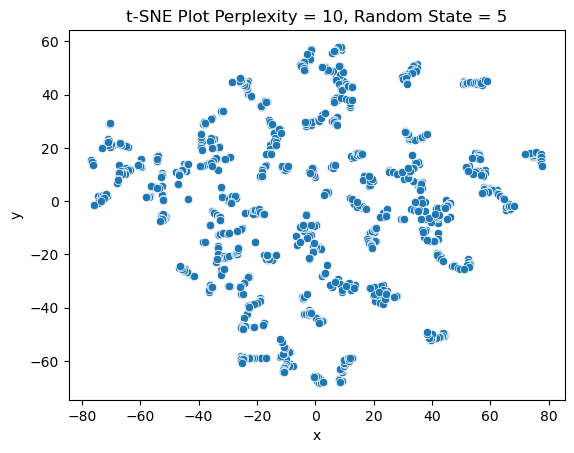

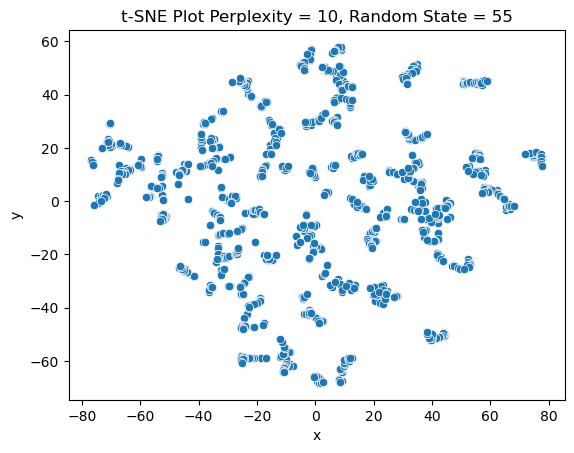

\../\../\../


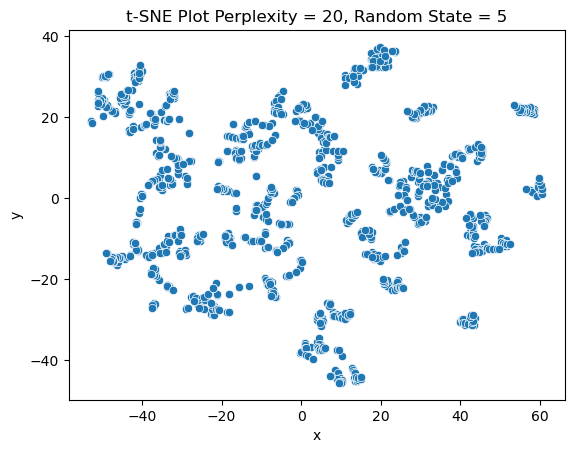

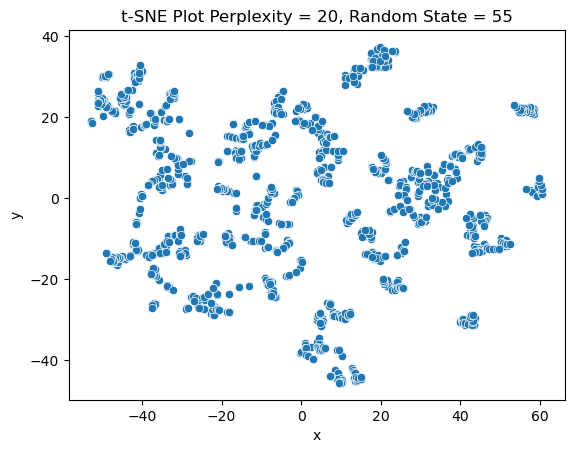

\../\../\../


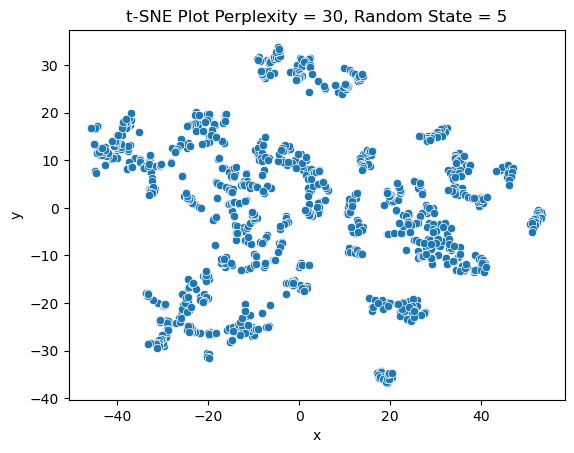

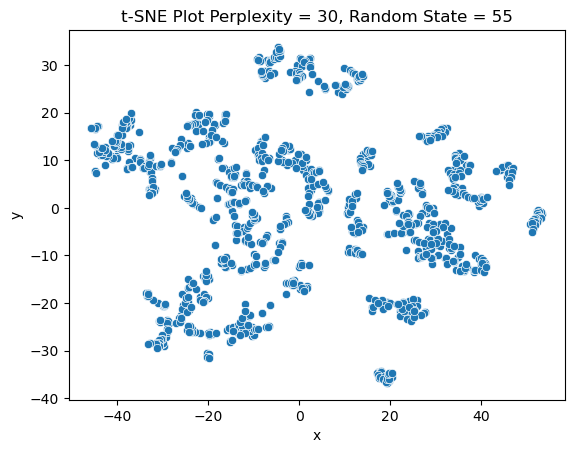

\../\../\../


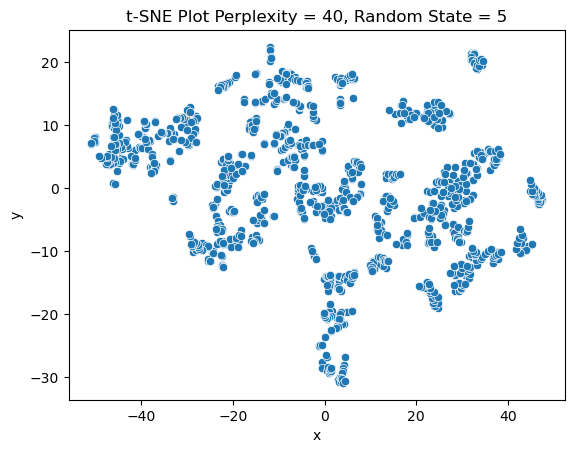

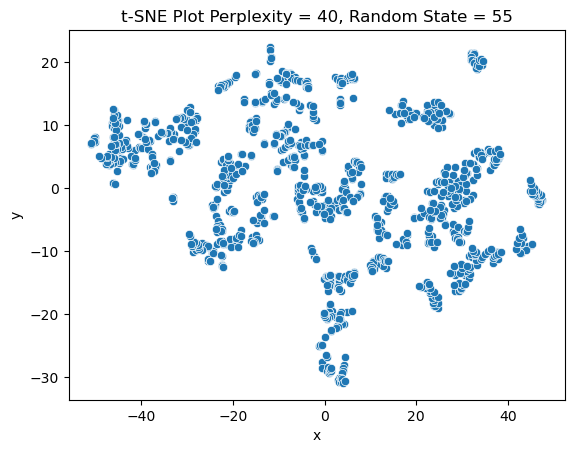

\../\../\../


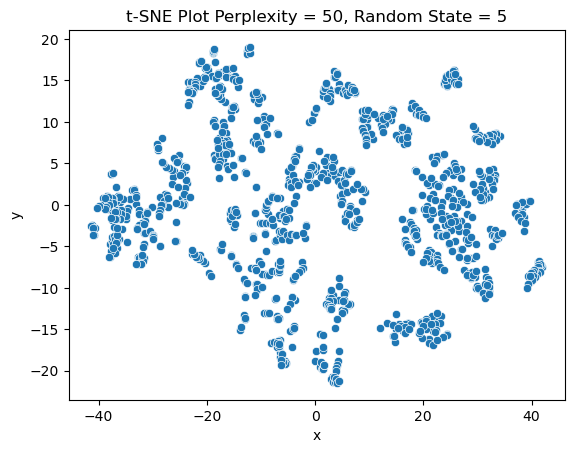

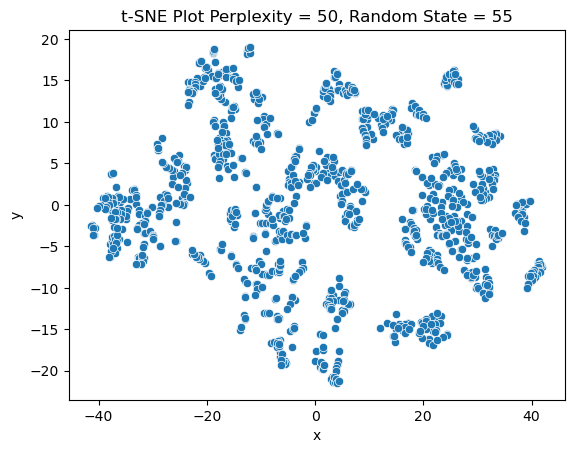

\../\../\../


In [66]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [5, 55]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_numerical_scale)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot Perplexity = %s, Random State = %s' %(perp, rs))
        plt.show()
    print('\../\../\../')